In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import timeit
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RANSACRegressor
from sklearn.svm import SVR
from sklearn import metrics
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor

In [2]:
df_power_2 = pd.read_csv('/Users/Mansi/Documents/INF2179H/Project/Plant_2_Generation_Data.csv', header = 0, engine = 'c')
df_power_2.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07


In [3]:
df_weather_2 = pd.read_csv('/Users/Mansi/Documents/INF2179H/Project/Plant_2_Weather_Sensor_Data.csv', header = 0, engine = 'c')
df_weather_2.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
1,2020-05-15 00:15:00,4136001,iq8k7ZNt4Mwm3w0,26.880811,24.421869,0.0
2,2020-05-15 00:30:00,4136001,iq8k7ZNt4Mwm3w0,26.682055,24.427290,0.0
3,2020-05-15 00:45:00,4136001,iq8k7ZNt4Mwm3w0,26.500589,24.420678,0.0
4,2020-05-15 01:00:00,4136001,iq8k7ZNt4Mwm3w0,26.596148,25.088210,0.0


In [4]:
# Unify the datetime
df_power_2['DATE_TIME'] = pd.to_datetime(df_power_2['DATE_TIME'], errors='coerce')
df_power_2.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06
1,2020-05-15,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09
2,2020-05-15,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09
3,2020-05-15,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06
4,2020-05-15,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07


In [5]:
# Unify the datetime
df_weather_2['DATE_TIME'] = pd.to_datetime(df_weather_2['DATE_TIME'], errors='coerce')
df_weather_2.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
1,2020-05-15 00:15:00,4136001,iq8k7ZNt4Mwm3w0,26.880811,24.421869,0.0
2,2020-05-15 00:30:00,4136001,iq8k7ZNt4Mwm3w0,26.682055,24.427290,0.0
3,2020-05-15 00:45:00,4136001,iq8k7ZNt4Mwm3w0,26.500589,24.420678,0.0
4,2020-05-15 01:00:00,4136001,iq8k7ZNt4Mwm3w0,26.596148,25.088210,0.0


In [6]:
# join power data and weather data, based on DATE_TIME
df_merged_2 = pd.merge(left = df_power_2, right = df_weather_2, on = 'DATE_TIME')
df_merged_2

,DATE_TIME,PLANT_ID_x,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,PLANT_ID_y,SOURCE_KEY_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
67693,2020-06-17 23:45:00,4136001,q49J1IKaHRwDQnt,0.0,0.0,4157.000000,5.207580e+05,4136001,iq8k7ZNt4Mwm3w0,23.202871,22.535908,0.0
67694,2020-06-17 23:45:00,4136001,rrq4fwE8jgrTyWY,0.0,0.0,3931.000000,1.211314e+08,4136001,iq8k7ZNt4Mwm3w0,23.202871,22.535908,0.0
67695,2020-06-17 23:45:00,4136001,vOuJvMaM2sgwLmb,0.0,0.0,4322.000000,2.427691e+06,4136001,iq8k7ZNt4Mwm3w0,23.202871,22.535908,0.0
67696,2020-06-17 23:45:00,4136001,xMbIugepa2P7lBB,0.0,0.0,4218.000000,1.068964e+08,4136001,iq8k7ZNt4Mwm3w0,23.202871,22.535908,0.0


In [7]:
df_merged_2 = df_merged_2.rename(columns = {"PLANT_ID_x":"PLANT_ID", "SOURCE_KEY_x":"Inverter_ID"})
df_merged_2 = df_merged_2.drop(columns = ['PLANT_ID_y','SOURCE_KEY_y'])
df_merged_2

,DATE_TIME,PLANT_ID,Inverter_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06,27.004764,25.060789,0.0
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09,27.004764,25.060789,0.0
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09,27.004764,25.060789,0.0
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06,27.004764,25.060789,0.0
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07,27.004764,25.060789,0.0
...,...,...,...,...,...,...,...,...,...,...
67693,2020-06-17 23:45:00,4136001,q49J1IKaHRwDQnt,0.0,0.0,4157.000000,5.207580e+05,23.202871,22.535908,0.0
67694,2020-06-17 23:45:00,4136001,rrq4fwE8jgrTyWY,0.0,0.0,3931.000000,1.211314e+08,23.202871,22.535908,0.0
67695,2020-06-17 23:45:00,4136001,vOuJvMaM2sgwLmb,0.0,0.0,4322.000000,2.427691e+06,23.202871,22.535908,0.0
67696,2020-06-17 23:45:00,4136001,xMbIugepa2P7lBB,0.0,0.0,4218.000000,1.068964e+08,23.202871,22.535908,0.0


In [8]:
df_merged_2['month'] = df_merged_2.DATE_TIME.dt.month
df_merged_2['day_of_month'] = df_merged_2.DATE_TIME.dt.day
df_merged_2['hour'] = df_merged_2.DATE_TIME.dt.hour
df_merged_2['minute'] = df_merged_2.DATE_TIME.dt.minute
df_merged_2['day_of_week'] = df_merged_2.DATE_TIME.dt.dayofweek
df_merged_2

,DATE_TIME,PLANT_ID,Inverter_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,month,day_of_month,hour,minute,day_of_week
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06,27.004764,25.060789,0.0,5,15,0,0,4
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09,27.004764,25.060789,0.0,5,15,0,0,4
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09,27.004764,25.060789,0.0,5,15,0,0,4
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06,27.004764,25.060789,0.0,5,15,0,0,4
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07,27.004764,25.060789,0.0,5,15,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67693,2020-06-17 23:45:00,4136001,q49J1IKaHRwDQnt,0.0,0.0,4157.000000,5.207580e+05,23.202871,22.535908,0.0,6,17,23,45,2
67694,2020-06-17 23:45:00,4136001,rrq4fwE8jgrTyWY,0.0,0.0,3931.000000,1.211314e+08,23.202871,22.535908,0.0,6,17,23,45,2
67695,2020-06-17 23:45:00,4136001,vOuJvMaM2sgwLmb,0.0,0.0,4322.000000,2.427691e+06,23.202871,22.535908,0.0,6,17,23,45,2
67696,2020-06-17 23:45:00,4136001,xMbIugepa2P7lBB,0.0,0.0,4218.000000,1.068964e+08,23.202871,22.535908,0.0,6,17,23,45,2


In [9]:
df_input = df_merged_2.copy()
df_input = df_input[['AC_POWER','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION','DATE_TIME']]
df_input.head()

,AC_POWER,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE_TIME
0,0.0,27.004764,25.060789,0.0,2020-05-15
1,0.0,27.004764,25.060789,0.0,2020-05-15
2,0.0,27.004764,25.060789,0.0,2020-05-15
3,0.0,27.004764,25.060789,0.0,2020-05-15
4,0.0,27.004764,25.060789,0.0,2020-05-15


In [11]:
# I split dataframe in to multiple dataframes by inverter_ID
# each dataframe after split only consists data for 1 single inverter
# dataframes are stored in a list
inverter_group = df_merged_2.groupby(df_merged_2.Inverter_ID)
list_df_inverter = [] # the list used in
inverter_list = list(set(df_merged_2.Inverter_ID))

In [12]:
for inv in inverter_list:
    df_temp = inverter_group.get_group(inv)
    list_df_inverter.append(df_temp)

## This plot confirms our assumption
Irradiation & temprature are highly correlated to power output

In [13]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
# plot correlation matrix on 1 inverter
corr = list_df_inverter[0].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(3)

/Users/Mansi/opt/anaconda3/lib/python3.8/site-packages/pandas/io/formats/style.py:1089: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
/Users/Mansi/opt/anaconda3/lib/python3.8/site-packages/pandas/io/formats/style.py:1090: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,month,day_of_month,hour,minute,day_of_week
PLANT_ID,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
DC_POWER,nan,1.000,1.000,-0.008,0.042,0.589,0.815,0.847,-0.126,0.082,0.021,0.001,0.010
AC_POWER,nan,1.000,1.000,-0.009,0.042,0.589,0.815,0.847,-0.126,0.082,0.021,0.001,0.010
DAILY_YIELD,nan,-0.008,-0.009,1.000,0.103,0.401,0.101,-0.077,-0.072,0.026,0.671,0.012,0.021
TOTAL_YIELD,nan,0.042,0.042,0.103,1.000,-0.084,-0.141,-0.151,-0.058,0.044,-0.013,-0.003,0.006
AMBIENT_TEMPERATURE,nan,0.589,0.589,0.401,-0.084,1.000,0.847,0.667,-0.367,0.296,0.367,0.002,0.108
MODULE_TEMPERATURE,nan,0.815,0.815,0.101,-0.141,0.847,1.000,0.947,-0.191,0.142,0.152,0.002,0.065
IRRADIATION,nan,0.847,0.847,-0.077,-0.151,0.667,0.947,1.000,-0.095,0.063,0.021,-0.002,0.032
month,nan,-0.126,-0.126,-0.072,-0.058,-0.367,-0.191,-0.095,1.000,-0.820,-0.009,-0.001,-0.187
day_of_month,nan,0.082,0.082,0.026,0.044,0.296,0.142,0.063,-0.820,1.000,0.005,0.001,0.202


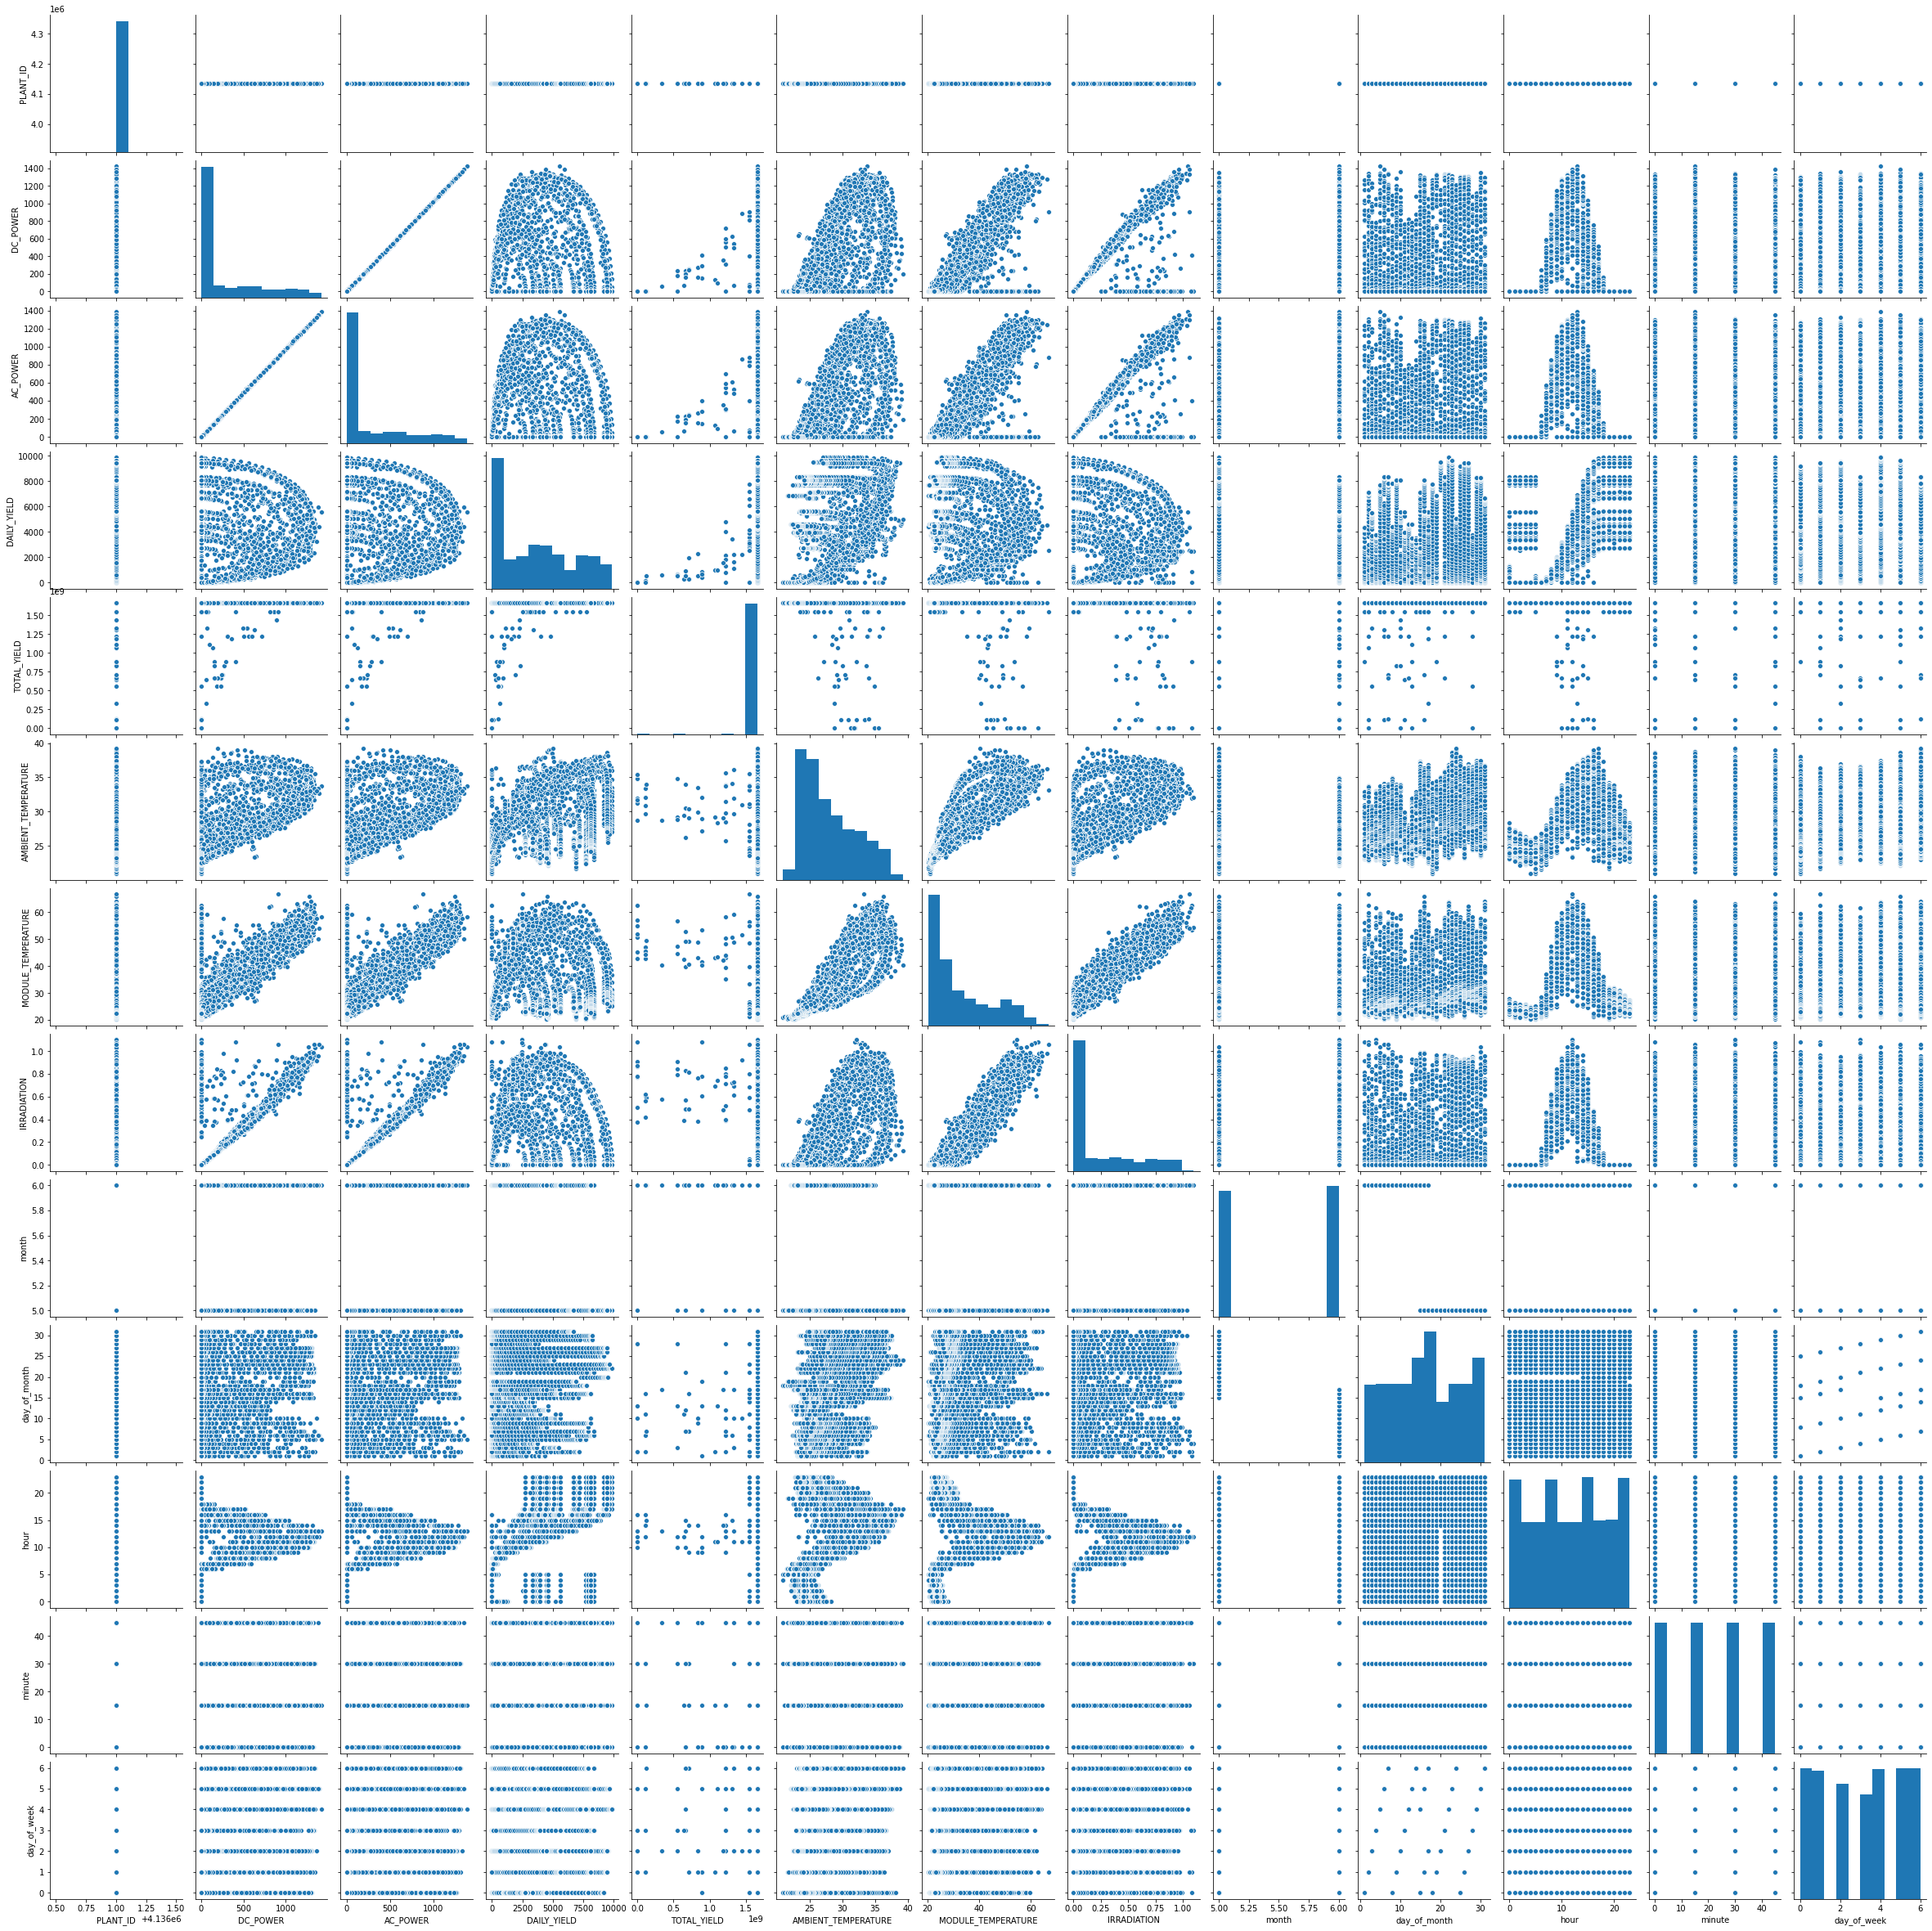

In [14]:
sns.pairplot(list_df_inverter[0])

In [15]:
list_df_inverter[0]

,DATE_TIME,PLANT_ID,Inverter_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,month,day_of_month,hour,minute,day_of_week
15,2020-05-15 00:00:00,4136001,oZ35aAeoifZaQzV,0.0,0.0,1281.466667,1.659965e+09,27.004764,25.060789,0.0,5,15,0,0,4
37,2020-05-15 00:15:00,4136001,oZ35aAeoifZaQzV,0.0,0.0,0.000000,1.659965e+09,26.880811,24.421869,0.0,5,15,0,15,4
59,2020-05-15 00:30:00,4136001,oZ35aAeoifZaQzV,0.0,0.0,0.000000,1.659965e+09,26.682055,24.427290,0.0,5,15,0,30,4
81,2020-05-15 00:45:00,4136001,oZ35aAeoifZaQzV,0.0,0.0,0.000000,1.659965e+09,26.500589,24.420678,0.0,5,15,0,45,4
103,2020-05-15 01:00:00,4136001,oZ35aAeoifZaQzV,0.0,0.0,0.000000,1.659965e+09,26.596148,25.088210,0.0,5,15,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67603,2020-06-17 22:45:00,4136001,oZ35aAeoifZaQzV,0.0,0.0,4467.000000,1.660189e+09,23.511703,22.856201,0.0,6,17,22,45,2
67625,2020-06-17 23:00:00,4136001,oZ35aAeoifZaQzV,0.0,0.0,4467.000000,1.660189e+09,23.482282,22.744190,0.0,6,17,23,0,2
67647,2020-06-17 23:15:00,4136001,oZ35aAeoifZaQzV,0.0,0.0,4467.000000,1.660189e+09,23.354743,22.492245,0.0,6,17,23,15,2
67669,2020-06-17 23:30:00,4136001,oZ35aAeoifZaQzV,0.0,0.0,4467.000000,1.660189e+09,23.291048,22.373909,0.0,6,17,23,30,2


In [16]:
plt.show()

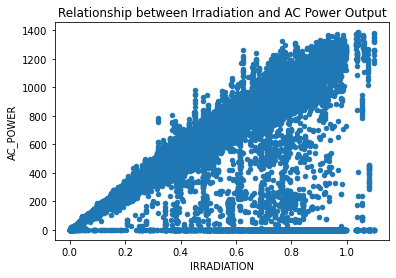

In [17]:
df_merged_2.plot(x = 'IRRADIATION', y = 'AC_POWER', kind = 'scatter')
plt.title('Relationship between Irradiation and AC Power Output')
plt.show()

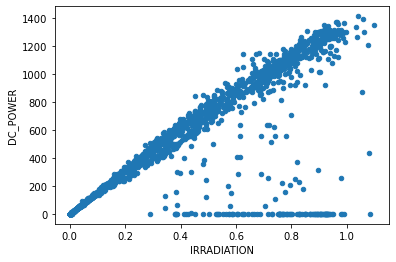

In [18]:
df_merged_2.loc[df_merged_2['Inverter_ID'] == 'Mx2yZCDsyf6DPfv',:].plot(x = 'IRRADIATION', y = 'DC_POWER', kind = 'scatter')
plt.show()

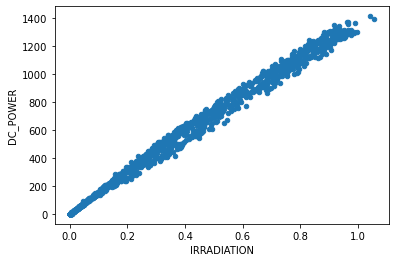

In [27]:
df_filter.loc[df_filter['Inverter_ID'] == 'Mx2yZCDsyf6DPfv',:].plot(x = 'IRRADIATION', y = 'DC_POWER', kind = 'scatter')
plt.show()

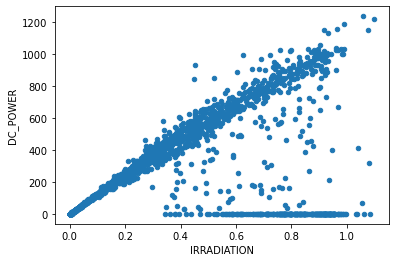

In [28]:
df_merged_2.loc[df_merged_2['Inverter_ID'] == 'Quc1TzYxW2pYoWX',:].plot(x = 'IRRADIATION', y = 'DC_POWER', kind = 'scatter')
plt.show()

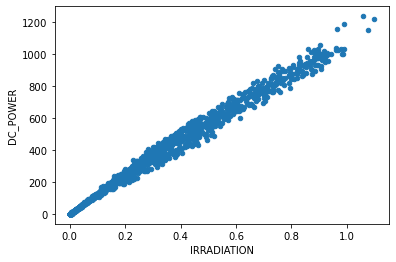

In [29]:
df_filter.loc[df_filter['Inverter_ID'] == 'Quc1TzYxW2pYoWX',:].plot(x = 'IRRADIATION', y = 'DC_POWER', kind = 'scatter')
plt.show()

In [30]:
df_filter.loc[(df_filter['IRRADIATION']>0) & (df_filter['DC_POWER'] == 0),:]

,DATE_TIME,PLANT_ID,Inverter_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,month,day_of_month,hour,minute,day_of_week
521,2020-05-15 05:45:00,4136001,oZ35aAeoifZaQzV,0.0,0.0,0.0,1.659965e+09,24.741274,23.786662,0.002838,5,15,5,45,4
1841,2020-05-15 20:45:00,4136001,oZ35aAeoifZaQzV,0.0,0.0,7096.0,1.659972e+09,31.047411,29.370690,0.000120,5,15,20,45,4
2611,2020-05-16 05:45:00,4136001,oZ35aAeoifZaQzV,0.0,0.0,0.0,1.659972e+09,23.752795,21.518120,0.001472,5,16,5,45,5
3711,2020-05-16 18:15:00,4136001,oZ35aAeoifZaQzV,0.0,0.0,8062.0,1.659980e+09,29.016220,26.250011,0.000427,5,16,18,15,5
3733,2020-05-16 18:30:00,4136001,oZ35aAeoifZaQzV,0.0,0.0,8062.0,1.659980e+09,29.191568,26.274048,0.001153,5,16,18,30,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65575,2020-06-16 23:45:00,4136001,Quc1TzYxW2pYoWX,0.0,0.0,4430.0,3.296422e+08,24.038417,23.196062,0.000037,6,16,23,45,1
65597,2020-06-17 00:00:00,4136001,Quc1TzYxW2pYoWX,0.0,0.0,4430.0,3.296422e+08,24.149389,23.853163,0.000024,6,17,0,0,2
65993,2020-06-17 04:30:00,4136001,Quc1TzYxW2pYoWX,0.0,0.0,0.0,3.296422e+08,22.971486,22.078925,0.000082,6,17,4,30,2
66103,2020-06-17 05:45:00,4136001,Quc1TzYxW2pYoWX,0.0,0.0,0.0,3.296422e+08,22.551586,21.908376,0.000195,6,17,5,45,2


In [20]:
a = df_merged_2.loc[df_merged_2['Inverter_ID'] == 'Quc1TzYxW2pYoWX',['IRRADIATION','DC_POWER']]
a.corr()

,IRRADIATION,DC_POWER
IRRADIATION,1.000000,0.646032
DC_POWER,0.646032,1.000000


In [21]:
b = df_merged_2.loc[df_merged_2['Inverter_ID'] == 'Mx2yZCDsyf6DPfv',['IRRADIATION','DC_POWER']]
c = np.array(b.corr())[0,1]
c

0.8752837039771388

## START

In [22]:
df_line = df_merged_2.copy()
#df_line = df_line[['DATE_TIME','Inverter_ID','IRRADIATION','AC_POWER']]
#df_line = df_line.set_index('DATE_TIME')

In [23]:
inverter_group = df_line.groupby(df_line.Inverter_ID)
list_df_inverter = [] # the list used in
inverter_list = list(set(df_line.Inverter_ID))
for inv in inverter_list:
    df_temp = inverter_group.get_group(inv)
    list_df_inverter.append(df_temp)

In [24]:
list_df_filtered = []
for i in range(len(inverter_list)):
    df_temp = list_df_inverter[i]
    X_temp = df_temp['IRRADIATION'].values.reshape(-1,1)
    Y_temp = df_temp['AC_POWER'].values.reshape(-1,1)
    lr_temp = RANSACRegressor(residual_threshold = 300, random_state = 0).fit(X_temp, Y_temp)
    lr_pred_temp = lr_temp.predict(X_temp)
    a = lr_temp.estimator_.coef_[0,0]
    b = -1
    c = 0
    Distance = abs( a*X_temp + b*Y_temp + c ) / (np.sqrt( a*a + b*b))
    Dis = Distance.reshape(-1)
    dis_iqr = stats.iqr(Dis)
    TF_dis = Distance < ( pd.Series(Dis).quantile(0.75) + 1.5*dis_iqr)
    TF_dis = TF_dis.reshape(-1)
    df_temp = df_temp.loc[TF_dis, :]
    list_df_filtered.append(df_temp)

In [25]:
df_filter = pd.concat(list_df_filtered)

In [26]:
df_filter

,DATE_TIME,PLANT_ID,Inverter_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,month,day_of_month,hour,minute,day_of_week
15,2020-05-15 00:00:00,4136001,oZ35aAeoifZaQzV,0.0,0.0,1281.466667,1.659965e+09,27.004764,25.060789,0.0,5,15,0,0,4
37,2020-05-15 00:15:00,4136001,oZ35aAeoifZaQzV,0.0,0.0,0.000000,1.659965e+09,26.880811,24.421869,0.0,5,15,0,15,4
59,2020-05-15 00:30:00,4136001,oZ35aAeoifZaQzV,0.0,0.0,0.000000,1.659965e+09,26.682055,24.427290,0.0,5,15,0,30,4
81,2020-05-15 00:45:00,4136001,oZ35aAeoifZaQzV,0.0,0.0,0.000000,1.659965e+09,26.500589,24.420678,0.0,5,15,0,45,4
103,2020-05-15 01:00:00,4136001,oZ35aAeoifZaQzV,0.0,0.0,0.000000,1.659965e+09,26.596148,25.088210,0.0,5,15,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67599,2020-06-17 22:45:00,4136001,Quc1TzYxW2pYoWX,0.0,0.0,3702.000000,3.296459e+08,23.511703,22.856201,0.0,6,17,22,45,2
67621,2020-06-17 23:00:00,4136001,Quc1TzYxW2pYoWX,0.0,0.0,3702.000000,3.296459e+08,23.482282,22.744190,0.0,6,17,23,0,2
67643,2020-06-17 23:15:00,4136001,Quc1TzYxW2pYoWX,0.0,0.0,3702.000000,3.296459e+08,23.354743,22.492245,0.0,6,17,23,15,2
67665,2020-06-17 23:30:00,4136001,Quc1TzYxW2pYoWX,0.0,0.0,3702.000000,3.296459e+08,23.291048,22.373909,0.0,6,17,23,30,2


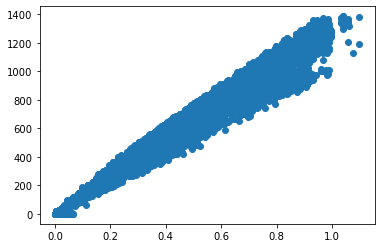

In [31]:
plt.scatter(x = df_filter.loc[:,'IRRADIATION'], y = df_filter.loc[:,'AC_POWER'])
#plt.scatter(x = X_temp, y = high_temp)
#plt.scatter(x = X_temp, y = lr_pred_temp)
plt.show()

In [32]:
df_input = df_filter.copy()
df_input = df_input[['AC_POWER','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION','month','day_of_month','hour','minute','day_of_week']]
Input = df_input.iloc[:,1:]
Target = df_input.iloc[:,0]
scaler = MinMaxScaler()
Input_scaled = scaler.fit_transform(Input)
Input_scaled  = pd.DataFrame(Input_scaled, columns = Input.columns)
X = Input_scaled
Y = Target 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

END

Run 2 models on filtered data
share results
Outliers - filter points >.75Quartile + 1 | <.25 - 
25quar - 75 Quar = Inliers


### Linear Regression


In [33]:
df_input = df_merged_2.copy()
df_input = df_input[['AC_POWER','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION','month','day_of_month','hour','minute','day_of_week']]
Input = df_input.iloc[:,1:]
Target = df_input.iloc[:,0]
scaler = MinMaxScaler() ##standard scale, data cleaning, tune hyper parameters
Input_scaled = scaler.fit_transform(Input)
Input_scaled  = pd.DataFrame(Input_scaled, columns = Input.columns)
Target = pd.DataFrame(Target)
X = Input_scaled
Y = Target 
features = Input.columns
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print(len(X_train),len(Y_train))

54158 54158


{'Model': ['Linear Regression'], 'RMSE': [29.52540518680679], 'R2': [0.9931273053450461]}


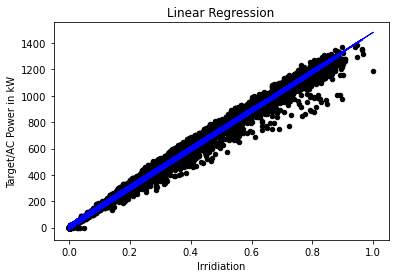

RF train accuracy: 0.994
RF test accuracy: 0.993


In [76]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression


regr = LinearRegression()
regr.fit(X_train, Y_train)
y_pred = regr.predict(X_test)

test_set_rmse_LR = (np.sqrt(mean_squared_error(Y_test, y_pred)))

test_set_r2_LR = r2_score(Y_test, y_pred)

output = {'Model':['Linear Regression'], 'RMSE': [test_set_rmse_LR], 'R2' : [test_set_r2_LR]}
print(output)
plt.figure()
# # Plot outputs
plt.scatter(X_test['IRRADIATION'], Y_test, s=20, color='black', label = True)
plt.plot(X_test['IRRADIATION'], y_pred, color='blue', linewidth=1)
plt.xlabel("Irridiation")
plt.ylabel("Target/AC Power in kW")
plt.title("Linear Regression")

plt.show()
print("RF train accuracy: %0.3f" % regr.score(X_train, Y_train))
print("RF test accuracy: %0.3f" % regr.score(X_test, Y_test))



No handles with labels found to put in legend.


{'Model': ['Regression Tree Best'], 'RMSE': [23.94536862045374], 'R2': [0.995479584340536]}


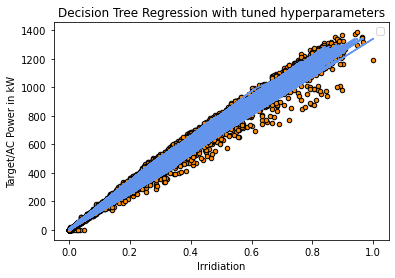

In [65]:
plt.scatter(X_test['IRRADIATION'], Y_test, s=20, edgecolor="black", c="darkorange")
plt.plot(X_test['IRRADIATION'], regrT_result, color="cornflowerblue")
plt.xlabel("Irridiation")
plt.ylabel("Target/AC Power in kW")
plt.title("Decision Tree Regression with tuned hyperparameters")
plt.legend()
test_set_rmse_RT_Best = (np.sqrt(mean_squared_error(Y_test, regrT_result)))
test_set_r2_RT_Best = r2_score(Y_test, regrT_result)

output = {'Model':['Regression Tree Best'], 'RMSE': [test_set_rmse_RT_Best], 'R2' : [test_set_r2_RT_Best]}
print(output)
# # Plot outputs

In [77]:
from sklearn import metrics
import numpy as np
print("Train Set Accuracy")
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_train, regr.predict(X_train)))
print('Mean Squared Error:', metrics.mean_squared_error(Y_train, regr.predict(X_train)))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_train, regr.predict(X_train))))
print('---------------------------')
print("Test Set Accuracy")
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Train Set Accuracy
Mean Absolute Error: 16.749260214470144
Mean Squared Error: 813.8087873814821
Root Mean Squared Error: 28.527334039154134
---------------------------
Test Set Accuracy
Mean Absolute Error: 17.240873670641438
Mean Squared Error: 871.7495514451173
Root Mean Squared Error: 29.52540518680679


In [78]:
y_pred = regr.predict(X_test)

### Running the whole data set in the model trained with filtered data

In [79]:
df_merged_2.head()

,DATE_TIME,PLANT_ID,Inverter_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,month,day_of_month,hour,minute,day_of_week
0,2020-05-15,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06,27.004764,25.060789,0.0,5,15,0,0,4
1,2020-05-15,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09,27.004764,25.060789,0.0,5,15,0,0,4
2,2020-05-15,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09,27.004764,25.060789,0.0,5,15,0,0,4
3,2020-05-15,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06,27.004764,25.060789,0.0,5,15,0,0,4
4,2020-05-15,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07,27.004764,25.060789,0.0,5,15,0,0,4


In [80]:
df_input = df_merged_2.copy()
df_input = df_input[['AC_POWER','IRRADIATION','month']]
df_input.head()

,AC_POWER,IRRADIATION,month
0,0.0,0.0,5
1,0.0,0.0,5
2,0.0,0.0,5
3,0.0,0.0,5
4,0.0,0.0,5


In [81]:
Input = df_input.iloc[:,1:]
Target = df_input.iloc[:,0]
scaler = MinMaxScaler() ##standard scale, data cleaning, tune hyper parameters
Input_scaled = scaler.fit_transform(Input)
Input_scaled  = pd.DataFrame(Input_scaled, columns = Input.columns)
Target = pd.DataFrame(Target)
#Input_scaled.head()
X = Input_scaled
Y = Target 

In [101]:
#predicted_values = regr.predict(X)
predicted_values = RegrT_model.predict(X)

In [102]:
AC_Power_Predicted = pd.DataFrame(predicted_values)
AC_Power_Predicted = AC_Power_Predicted.rename(columns={0: "AC_Power_Predicted"})

In [103]:
df_predict = df_merged_2.copy()

#Merging predicted AC power with old merged DF of plant 2
df_predict_merged = pd.concat([df_predict,AC_Power_Predicted], axis=1, sort=False) 

df_predict_merged

,DATE_TIME,PLANT_ID,Inverter_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,month,day_of_month,hour,minute,day_of_week,AC_Power_Predicted
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06,27.004764,25.060789,0.0,5,15,0,0,4,0.0
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09,27.004764,25.060789,0.0,5,15,0,0,4,0.0
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09,27.004764,25.060789,0.0,5,15,0,0,4,0.0
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06,27.004764,25.060789,0.0,5,15,0,0,4,0.0
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07,27.004764,25.060789,0.0,5,15,0,0,4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67693,2020-06-17 23:45:00,4136001,q49J1IKaHRwDQnt,0.0,0.0,4157.000000,5.207580e+05,23.202871,22.535908,0.0,6,17,23,45,2,NaN
67694,2020-06-17 23:45:00,4136001,rrq4fwE8jgrTyWY,0.0,0.0,3931.000000,1.211314e+08,23.202871,22.535908,0.0,6,17,23,45,2,NaN
67695,2020-06-17 23:45:00,4136001,vOuJvMaM2sgwLmb,0.0,0.0,4322.000000,2.427691e+06,23.202871,22.535908,0.0,6,17,23,45,2,NaN
67696,2020-06-17 23:45:00,4136001,xMbIugepa2P7lBB,0.0,0.0,4218.000000,1.068964e+08,23.202871,22.535908,0.0,6,17,23,45,2,NaN


In [104]:
df_predict_updated = df_predict_merged.copy()

# Updating predicted AC power with 0 if predicted power is <0, otherwise keeping the predicted value
df_predict_updated['AC_Power_Predicted'] = np.where(df_predict_updated['AC_Power_Predicted']<0, 0, df_predict_updated['AC_Power_Predicted'])

In [105]:
df_predict_updated['Gap'] = df_predict_updated['AC_POWER'] - df_predict_updated['AC_Power_Predicted']

In [106]:
df_predict_updated['Date'] = df_predict_updated['DATE_TIME'].dt.date

In [107]:
df_predict_updated

,DATE_TIME,PLANT_ID,Inverter_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,month,day_of_month,hour,minute,day_of_week,AC_Power_Predicted,Gap,Date
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06,27.004764,25.060789,0.0,5,15,0,0,4,0.0,0.0,2020-05-15
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09,27.004764,25.060789,0.0,5,15,0,0,4,0.0,0.0,2020-05-15
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09,27.004764,25.060789,0.0,5,15,0,0,4,0.0,0.0,2020-05-15
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06,27.004764,25.060789,0.0,5,15,0,0,4,0.0,0.0,2020-05-15
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07,27.004764,25.060789,0.0,5,15,0,0,4,0.0,0.0,2020-05-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67693,2020-06-17 23:45:00,4136001,q49J1IKaHRwDQnt,0.0,0.0,4157.000000,5.207580e+05,23.202871,22.535908,0.0,6,17,23,45,2,NaN,NaN,2020-06-17
67694,2020-06-17 23:45:00,4136001,rrq4fwE8jgrTyWY,0.0,0.0,3931.000000,1.211314e+08,23.202871,22.535908,0.0,6,17,23,45,2,NaN,NaN,2020-06-17
67695,2020-06-17 23:45:00,4136001,vOuJvMaM2sgwLmb,0.0,0.0,4322.000000,2.427691e+06,23.202871,22.535908,0.0,6,17,23,45,2,NaN,NaN,2020-06-17
67696,2020-06-17 23:45:00,4136001,xMbIugepa2P7lBB,0.0,0.0,4218.000000,1.068964e+08,23.202871,22.535908,0.0,6,17,23,45,2,NaN,NaN,2020-06-17


In [108]:
q75, q25 = np.percentile(df_predict_updated.Gap, [75,25])
iqr = q75 - q25
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
print("q25:", q25 ,"\nq75:",q75,"\nIQR:",iqr, "\nLower Cut Off:",lower, "\nUpper Cut Off:",upper )

q25: nan 
q75: nan 
IQR: nan 
Lower Cut Off: nan 
Upper Cut Off: nan


In [109]:
np.percentile(df_predict_updated.Gap, [96])

array([nan])

In [110]:
# Function to update status of each record as faulty, working fine or need maintenance
def update_status(lower):
        for i in range(len(df_predict_updated)):
            gap = df_predict_updated.iloc[i]["Gap"]
            AC_Power = df_predict_updated.iloc[i]["AC_POWER"]
            AC_Power_Predicted = df_predict_updated.iloc[i]["AC_Power_Predicted"]
            Irridiation = df_predict_updated.iloc[i]["IRRADIATION"]
            DC_Power = df_predict_updated.iloc[i]["DC_POWER"] 
            if(Irridiation > 0):
                if((AC_Power == 0.0) & (AC_Power_Predicted > 0)):
                    if(DC_Power > 0.0):
                        df_predict_updated.at[i, 'Status'] = "Faulty Inverter"
                    else:
                        df_predict_updated.at[i, 'Status'] = "Faulty Equipment"
                elif(gap < lower):
                    df_predict_updated.at[i, 'Status'] = "Need Maintenance"
                else:
                    df_predict_updated.at[i, 'Status'] = "Working Fine"
            elif(Irridiation == 0.0):
                    df_predict_updated.at[i, 'Status'] = "Working Fine" 

In [111]:
update_status(lower)

In [112]:
df_predict_updated.Status.value_counts()

Working Fine        64616
Faulty Equipment     3082
Name: Status, dtype: int64

In [113]:
df_predict_updated[df_predict_updated['Status'] == 'Faulty Equipment']['Inverter_ID'].value_counts()

LYwnQax7tkwH5Cb    212
Et9kgGMDl729KT4    201
rrq4fwE8jgrTyWY    192
81aHJ1q11NBPMrL    190
q49J1IKaHRwDQnt    183
Quc1TzYxW2pYoWX    183
WcxssY2VbP4hApt    177
LlT2YUhhzqhg5Sw    163
9kRcWv60rDACzjR    160
xoJJ8DcxJEcupym    158
PeE6FRyGXUgsRhN    143
oZZkBaNadn6DNKz    142
V94E5Ben1TlhnDV    140
vOuJvMaM2sgwLmb    140
oZ35aAeoifZaQzV    114
Qf4GUc1pJu5T6c6    109
4UPUqMRk7TRMgml    106
Mx2yZCDsyf6DPfv    102
NgDl19wMapZy17u     74
mqwcsP2rE7J0TFp     66
xMbIugepa2P7lBB     64
IQ2d7wF4YD8zU1Q     63
Name: Inverter_ID, dtype: int64

In [263]:
df_predict_updated[df_predict_updated['Status'] == 'Need Maintenance']['Inverter_ID'].value_counts()

Quc1TzYxW2pYoWX    1351
Et9kgGMDl729KT4    1174
rrq4fwE8jgrTyWY    1049
LYwnQax7tkwH5Cb     914
PeE6FRyGXUgsRhN     749
LlT2YUhhzqhg5Sw     656
q49J1IKaHRwDQnt     630
xoJJ8DcxJEcupym     514
9kRcWv60rDACzjR     465
81aHJ1q11NBPMrL     431
V94E5Ben1TlhnDV     392
NgDl19wMapZy17u     370
mqwcsP2rE7J0TFp     347
xMbIugepa2P7lBB     332
oZZkBaNadn6DNKz     315
WcxssY2VbP4hApt     311
Qf4GUc1pJu5T6c6     290
vOuJvMaM2sgwLmb     275
4UPUqMRk7TRMgml     238
Mx2yZCDsyf6DPfv     237
IQ2d7wF4YD8zU1Q     237
oZ35aAeoifZaQzV     187
Name: Inverter_ID, dtype: int64

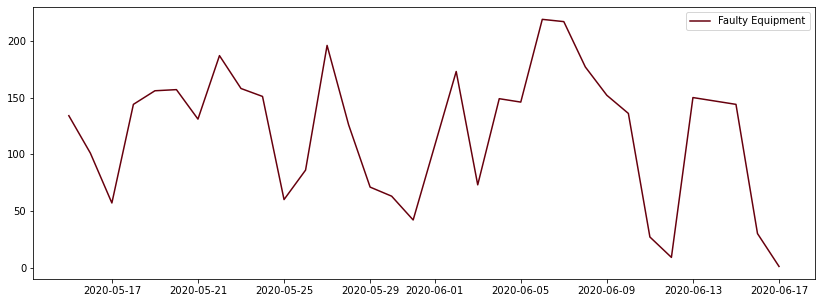

In [264]:
plt.figure(figsize = (14,5))
df_predict_updated[df_predict_updated['Status'] == 'Faulty Equipment']['Date'].value_counts().plot(legend=True, colormap='Reds_r', label = 'Faulty Equipment')
plt.show()

In [265]:
df_predict_updated[df_predict_updated["Status"] == "Faulty Equipment"]["Date"].value_counts()

2020-06-06    219
2020-06-07    217
2020-05-27    196
2020-05-22    187
2020-06-08    177
2020-06-02    173
2020-05-23    158
2020-05-20    157
2020-05-19    156
2020-06-09    152
2020-05-24    151
2020-06-13    150
2020-06-04    149
2020-06-14    147
2020-06-05    146
2020-06-15    144
2020-05-18    144
2020-06-10    136
2020-05-15    134
2020-05-21    131
2020-05-28    126
2020-05-16    101
2020-05-26     86
2020-06-03     73
2020-05-29     71
2020-05-30     63
2020-05-25     60
2020-05-17     57
2020-05-31     42
2020-06-16     30
2020-06-11     27
2020-06-12      9
2020-06-17      1
Name: Date, dtype: int64

In [272]:
print("The most faults were recorded on {} and {} " 
      .format(df_predict_updated[df_predict_updated["Status"] == "Faulty Equipment"]["Date"].value_counts().index[0], 
            df_predict_updated[df_predict_updated["Status"] == "Faulty Equipment"]["Date"].value_counts().index[1]))

The most faults were recorded on 2020-06-06 and 2020-06-07 


In [273]:
print("The most maintenance needs were recorded on {} and {} " 
      .format(df_predict_updated[df_predict_updated["Status"]== "Need Maintenance"]["Date"].value_counts().index[0], 
            df_predict_updated[df_predict_updated["Status"]== "Need Maintenance"]["Date"].value_counts().index[1]))

The most maintenance needs were recorded on 2020-06-07 and 2020-06-02 


In [274]:
print("The 3 inverters with most faults or underperformance are {}, {} and {} " 
      .format(df_predict_updated[((df_predict_updated['Status']== "Faulty Equipment") | 
            (df_predict_updated['Status']== "Need Maintenance"))]["Inverter_ID"].value_counts().index[0], 
              df_predict_updated[((df_predict_updated['Status']== "Faulty Equipment") | 
            (df_predict_updated['Status']== "Need Maintenance"))]["Inverter_ID"].value_counts().index[1], 
              df_predict_updated[((df_predict_updated['Status']== "Faulty Equipment") | 
            (df_predict_updated['Status']== "Need Maintenance"))]["Inverter_ID"].value_counts().index[2]))

The 3 inverters with most faults or underperformance are Quc1TzYxW2pYoWX, Et9kgGMDl729KT4 and rrq4fwE8jgrTyWY 


In [269]:
print("The 3 inverters with most faults or underperformance are {} " .format(df_predict_updated[((df_predict_updated['Status']== "Faulty Equipment") | (df_predict_updated['Status']== "Need Maintenance"))]["Inverter_ID"].value_counts().index[21]))
      
      
      

The 3 inverters with most faults or underperformance are IQ2d7wF4YD8zU1Q 


In [159]:
df_predict_updated

,DATE_TIME,PLANT_ID,Inverter_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,month,day_of_month,hour,minute,day_of_week,AC_Power_Predicted,Gap,Date,Status
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06,27.004764,25.060789,0.0,5,15,0,0,4,0.0,0.0,2020-05-15,Working Fine
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09,27.004764,25.060789,0.0,5,15,0,0,4,0.0,0.0,2020-05-15,Working Fine
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09,27.004764,25.060789,0.0,5,15,0,0,4,0.0,0.0,2020-05-15,Working Fine
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06,27.004764,25.060789,0.0,5,15,0,0,4,0.0,0.0,2020-05-15,Working Fine
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07,27.004764,25.060789,0.0,5,15,0,0,4,0.0,0.0,2020-05-15,Working Fine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67693,2020-06-17 23:45:00,4136001,q49J1IKaHRwDQnt,0.0,0.0,4157.000000,5.207580e+05,23.202871,22.535908,0.0,6,17,23,45,2,0.0,0.0,2020-06-17,Working Fine
67694,2020-06-17 23:45:00,4136001,rrq4fwE8jgrTyWY,0.0,0.0,3931.000000,1.211314e+08,23.202871,22.535908,0.0,6,17,23,45,2,0.0,0.0,2020-06-17,Working Fine
67695,2020-06-17 23:45:00,4136001,vOuJvMaM2sgwLmb,0.0,0.0,4322.000000,2.427691e+06,23.202871,22.535908,0.0,6,17,23,45,2,0.0,0.0,2020-06-17,Working Fine
67696,2020-06-17 23:45:00,4136001,xMbIugepa2P7lBB,0.0,0.0,4218.000000,1.068964e+08,23.202871,22.535908,0.0,6,17,23,45,2,0.0,0.0,2020-06-17,Working Fine


## Linear Regression trained with Status

In [87]:
df_input = df_predict_updated.copy()
df_input = df_input[['AC_POWER','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION','month','day_of_month','hour','minute','day_of_week', 'Status']]
le = LabelEncoder()
col_Inverter_ID = le.fit_transform(df_input['Status'])
df_input['Status'] = col_Inverter_ID
Input = df_input.iloc[:,1:]
Target = df_input.iloc[:,0]
# scaler = MinMaxScaler() ##standard scale, data cleaning, tune hyper parameters
# Input_scaled = scaler.fit_transform(Input)
# Input_scaled  = pd.DataFrame(Input_scaled, columns = Input.columns)
# Target = pd.DataFrame(Target)
X = Input
Y = Target 
features = Input.columns
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print(len(X_train),len(Y_train))

NameError: name 'df_predict_updated' is not defined

{'Model': ['Linear Regression with Status'], 'RMSE': [29.52540518680679], 'R2': [0.9931273053450461]}


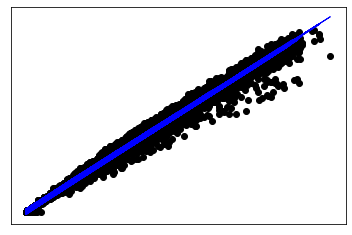

RF train accuracy: 0.994
RF test accuracy: 0.993


In [88]:
regr = LinearRegression()
regr.fit(X_train, Y_train)
y_pred = regr.predict(X_test)

test_set_rmse_LRS = (np.sqrt(mean_squared_error(Y_test, y_pred)))

test_set_r2_LRS = r2_score(Y_test, y_pred)

output = {'Model':['Linear Regression with Status'], 'RMSE': [test_set_rmse_LRS], 'R2' : [test_set_r2_LRS]}
print(output)

# # Plot outputs
plt.scatter(X_test['IRRADIATION'], Y_test,  color='black')
plt.plot(X_test['IRRADIATION'], y_pred, color='blue', linewidth=1)

plt.xticks(())
plt.yticks(())

plt.show()
print("RF train accuracy: %0.3f" % regr.score(X_train, Y_train))
print("RF test accuracy: %0.3f" % regr.score(X_test, Y_test))





### Regression Tree

In [89]:
df_input = df_filter.copy()
df_input = df_input[['AC_POWER','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION','month',
                     'day_of_month','hour','minute','day_of_week']]
Input = df_input.iloc[:,1:]
Target = df_input.iloc[:,0]
scaler = MinMaxScaler() ##standard scale, data cleaning, tune hyper parameters
Input_scaled = scaler.fit_transform(Input)
Input_scaled  = pd.DataFrame(Input_scaled, columns = Input.columns)
Target = pd.DataFrame(Target)
X = Input_scaled
Y = Target 
features = Input.columns
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

### Regression Tree implementation tuning hyper parameters

No handles with labels found to put in legend.


{'Model': ['Regression Tree Best'], 'RMSE': [23.945368620453742], 'R2': [0.995479584340536]}


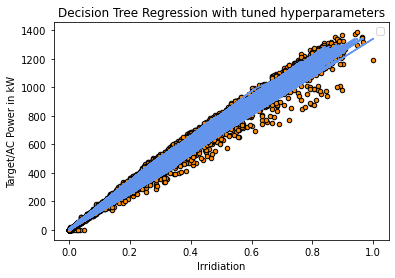

In [90]:
start_time = timeit.default_timer()
parameters = {'splitter' : ['best', 'random'], 'max_depth' : [4,5,6,15] , 
              'min_samples_split' : [50,60,75,100,1000]}

# Fit regression model
regrT = DecisionTreeRegressor()
clf = GridSearchCV(regrT, parameters, n_jobs = -1, scoring = 'neg_mean_squared_error', cv = 5)
best_regrT = clf.fit(X_train, Y_train)
elapsed = timeit.default_timer() - start_time

# Predict
RegrT_model = best_regrT.best_estimator_
regrT_result = RegrT_model.predict(X_test)

# Plot the results
plt.scatter(X_test['IRRADIATION'], Y_test, s=20, edgecolor="black", c="darkorange")
plt.plot(X_test['IRRADIATION'], regrT_result, color="cornflowerblue")
plt.xlabel("Irridiation")
plt.ylabel("Target/AC Power in kW")
plt.title("Decision Tree Regression with tuned hyperparameters")
plt.legend()
test_set_rmse_RT_Best = (np.sqrt(mean_squared_error(Y_test, regrT_result)))
test_set_r2_RT_Best = r2_score(Y_test, regrT_result)

##Print outputs
output = {'Model':['Regression Tree Best'], 'RMSE': [test_set_rmse_RT_Best], 'R2' : [test_set_r2_RT_Best]}
print(output)




### Basic Regression Tree implementation

In [115]:
# Fit regression model

regr = DecisionTreeRegressor(max_depth=6)
regr.fit(X_train, Y_train)

# Predict
y = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X_test['IRRADIATION'], Y_test, s=20, edgecolor="black", c="darkorange")
plt.plot(X_test['IRRADIATION'], y, color="yellowgreen")
plt.xlabel("Irridiation")
plt.ylabel("Target/AC Power in kW")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()



NameError: name 'regr_2' is not defined

In [88]:
test_set_rmse_RT = (np.sqrt(mean_squared_error(Y_test, y_2)))
test_set_r2_RT = r2_score(Y_test, y_2)
# print("RMSE ",test_set_rmse)
# print("R2 score",test_set_r2)
output = {'Model':['Regression Tree'], 'RMSE': [test_set_rmse_RT], 'R2' : [test_set_r2_RT]}
print(output)
# # Plot outputs

{'Model': ['Regression Tree'], 'RMSE': [26.345879193187457], 'R2': [0.9944697231615013]}


## Forecasting with Facebook Prophet

In [ ]:
conda install -c conda-forge fbprophet

In [ ]:
pip install pystan

In [ ]:
pip install fbprophet

In [ ]:
from fbprophet import Prophet

In [ ]:
from matplotlib import pyplot

In [ ]:
df_input = df_merged_2.copy()
df_input = df_input[['DATE_TIME','AC_POWER']]
df_input.info()

In [ ]:
df_input.plot(x='DATE_TIME')
plt.show()

In [ ]:
df_train = df_input[df_input['DATE_TIME'] < '2020-06-01']
df_predict = df_input[df_input['DATE_TIME'] > '2020-06-01']
df_train.columns = ['ds', 'y']

df_predict = df_predict.drop('AC_POWER', axis = 1)


In [ ]:
df_predict.columns = ['ds']

In [ ]:
model = Prophet()
# fit the model
model.fit(df_train)

In [ ]:
# use the model to make a forecast
forecast = model.predict(df_predict)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)

In [ ]:
from sklearn.metrics import mean_absolute_error
y_true = df_input[df_input['DATE_TIME'] > '2020-06-01']['AC_POWER'].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

In [ ]:
# plot expected vs actual
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()

In [ ]:
fig1 = model.plot(forecast)

### Predicting 3 days ahead

In [ ]:
df_train = df_input[df_input['DATE_TIME'] < '2020-06-13']
df_predict = df_input[df_input['DATE_TIME'] > '2020-06-12']
df_train.columns = ['ds', 'y']
df_predict = df_predict.drop('AC_POWER', axis = 1)
df_predict.columns = ['ds']

In [ ]:
model = Prophet()
# fit the model
model.fit(df_train)
# use the model to make a forecast
forecast = model.predict(df_predict)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)

In [ ]:
from sklearn.metrics import mean_absolute_error
y_true = df_input[df_input['DATE_TIME'] > '2020-06-12']['AC_POWER'].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

In [ ]:
# plot expected vs actual
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()

## Using Filtered Data

In [73]:
df_input = df_filter.copy()
df_input = df_input[['DATE_TIME','AC_POWER']]

In [74]:
df_train = df_input[df_input['DATE_TIME'] < '2020-05-25']
df_predict = df_input[df_input['DATE_TIME'] > '2020-05-25']
df_train.columns = ['ds', 'y']
df_predict = df_predict.drop('AC_POWER', axis = 1)
df_predict.columns = ['ds']

In [75]:
model = Prophet()
# fit the model
model.fit(df_train)
# use the model to make a forecast
forecast = model.predict(df_predict)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)

NameError: name 'Prophet' is not defined

In [216]:
from sklearn.metrics import mean_absolute_error
y_true = df_input[df_input['DATE_TIME'] > '2020-06-12']['AC_POWER'].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

MAE: 350.746


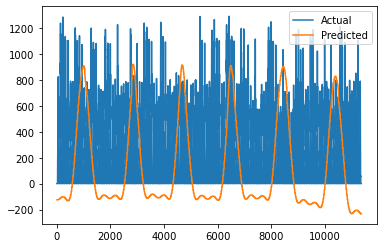

In [217]:
# plot expected vs actual
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()

## VARMA

In [280]:
# VARMA example
from statsmodels.tsa.statespace.varmax import VARMAX
from random import random
# contrived dataset with dependency
df_input = df_merged_2.copy()
df_input = df_input[['DATE_TIME','AC_POWER', 'IRRADIATION']]
df_input = df_input.drop('DATE_TIME', axis=1)
df_input.index = df_merged_2.DATE_TIME
# data_train = df_input[df_input['DATE_TIME'] < '2020-06-13']
# data = list(data_train)
# # fit model
# model = VARMAX(data, order=(1, 1))
# model_fit = model.fit(disp=False)
# # make prediction
# yhat = model_fit.forecast()
# print(yhat)

#creating the train and validation set
train = df_input[:int(0.8*(len(df_input)))]
valid = df_input[int(0.8*(len(df_input))):]

#fit the model
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(endog=train)
model_fit = model.fit()

# make prediction on validation
prediction = model_fit.forecast(model_fit.y, steps=len(valid))

/Users/Mansi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Mansi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [282]:
valid

,AC_POWER,IRRADIATION
DATE_TIME,,
2020-06-11 14:00:00,547.180000,0.355198
2020-06-11 14:00:00,463.826667,0.355198
2020-06-11 14:00:00,508.953333,0.355198
2020-06-11 14:00:00,530.880000,0.355198
2020-06-11 14:00:00,538.360000,0.355198
...,...,...
2020-06-17 23:45:00,0.000000,0.000000
2020-06-17 23:45:00,0.000000,0.000000
2020-06-17 23:45:00,0.000000,0.000000


In [283]:
cols = df_input.columns
#converting predictions to dataframe

pred = pd.DataFrame(index=range(0,len(prediction)),columns=[cols])
pred
for j in range(0,2):
    for i in range(0, len(prediction)):
        pred.iloc[i][j] = prediction[i][j]

**WRITE CODE TO PRINT RMSE..**

## End

In [16]:
df_plant_1['Light_conversion'] = df_plant_1['DC_POWER'] / df_plant_1['IRRADIATION']
df_plant_1['Light_conversion'] = df_plant_1['Light_conversion'].fillna(0)
df_plant_1['DCAC_conversion'] = df_plant_1['AC_POWER'] / df_plant_1['DC_POWER']
df_plant_1['DCAC_conversion'] = df_plant_1['DCAC_conversion'].fillna(0)

In [17]:
inverter_group = df_plant_1.groupby(df_plant_1.Inverter_ID)
list_df_inverter = [] # the list used in
inverter_list = list(set(df_plant_1.Inverter_ID))

In [18]:
for inv in inverter_list:
    df_temp = inverter_group.get_group(inv)
    list_df_inverter.append(df_temp)

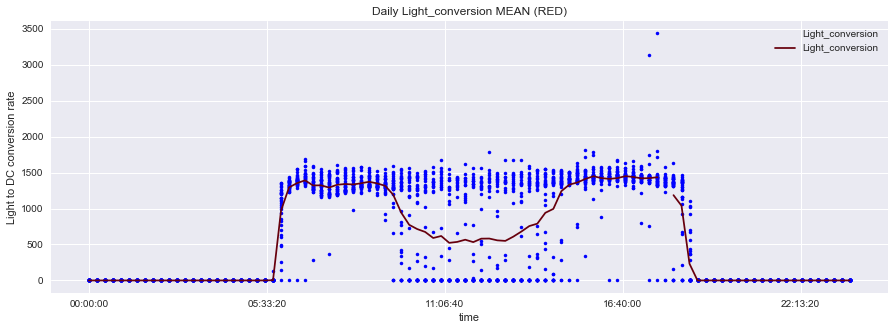

In [19]:
list_df_inverter[0].plot(x='time', y = 'Light_conversion' , style='b.', figsize=(15,5))
list_df_inverter[0].groupby('time')['Light_conversion'].agg('mean').plot(legend=True, colormap='Reds_r')
plt.title('Daily Light_conversion MEAN (RED)')
plt.ylabel('Light to DC conversion rate')
plt.show()

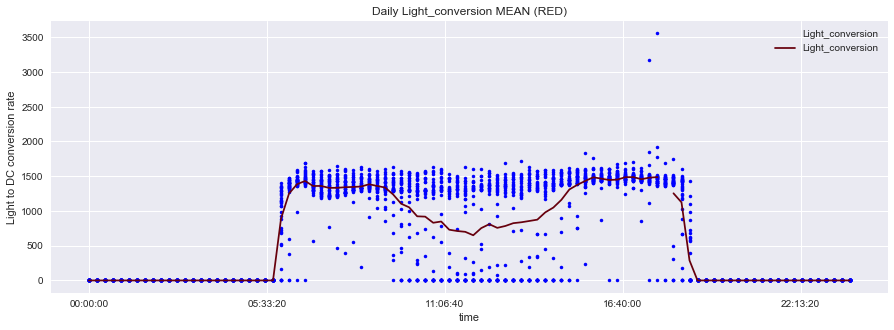

In [20]:
list_df_inverter[1].plot(x='time', y = 'Light_conversion' , style='b.', figsize=(15,5))
list_df_inverter[1].groupby('time')['Light_conversion'].agg('mean').plot(legend=True, colormap='Reds_r')
plt.title('Daily Light_conversion MEAN (RED)')
plt.ylabel('Light to DC conversion rate')
plt.show()

## Evaluate the efficiency of different inverters
Through the below 2 charts we could identify inverters with high or low efficiency in terms of DC output.
We could see that inverter 'Quc1TzYxW2pYoWX' and 'Et9kgGMDl729KT4' have significantly lower efficiency compared to others and 'Mx2yZCDsyf6DPfv' has the best efficiency.

In [24]:
print(set(df_plant_1['Inverter_ID']))

{'LYwnQax7tkwH5Cb', 'q49J1IKaHRwDQnt', 'vOuJvMaM2sgwLmb', '81aHJ1q11NBPMrL', 'IQ2d7wF4YD8zU1Q', 'oZZkBaNadn6DNKz', 'xoJJ8DcxJEcupym', 'Qf4GUc1pJu5T6c6', 'V94E5Ben1TlhnDV', 'xMbIugepa2P7lBB', 'rrq4fwE8jgrTyWY', '9kRcWv60rDACzjR', 'oZ35aAeoifZaQzV', 'NgDl19wMapZy17u', 'Mx2yZCDsyf6DPfv', 'PeE6FRyGXUgsRhN', 'WcxssY2VbP4hApt', 'Quc1TzYxW2pYoWX', 'Et9kgGMDl729KT4', 'LlT2YUhhzqhg5Sw', '4UPUqMRk7TRMgml', 'mqwcsP2rE7J0TFp'}


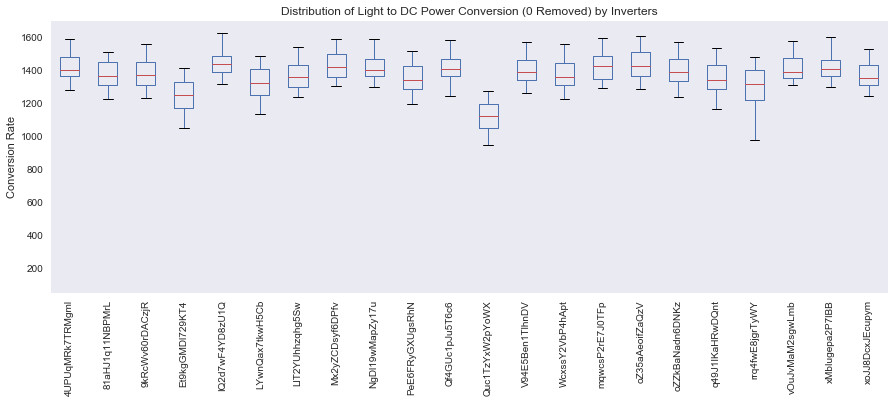

In [21]:
Light_conv = df_plant_1.loc[df_plant_1['DC_POWER']>0,:].pivot_table(values='Light_conversion', index='time', columns='Inverter_ID')
Light_conv.boxplot(figsize=(15,5), grid=False, rot=90)
plt.title('Distribution of Light to DC Power Conversion (0 Removed) by Inverters')
plt.ylabel('Conversion Rate')
plt.show()

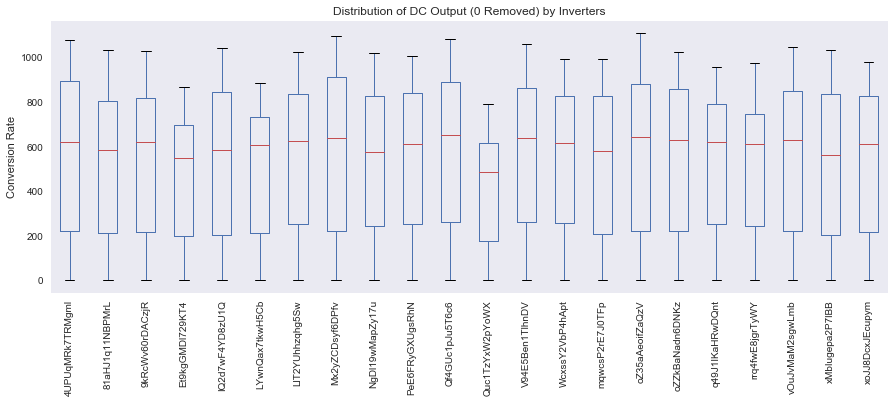

In [22]:
DC_output = df_plant_1.loc[df_plant_1['DC_POWER']>0,:].pivot_table(values='DC_POWER', index='time', columns='Inverter_ID')
DC_output.boxplot(figsize=(15,5), grid=False, rot=90)
plt.title('Distribution of DC Output (0 Removed) by Inverters')
plt.ylabel('Conversion Rate')
plt.show()

## Evaluate the efficiency of different inverters
The below 2 graphs show the DC and AC output of the selected high and low performing inverters.
The gap beteween these inverters could be casued by 2 factors：
1. Irradiation to DC power conversion, which may imply problems within the photovoltaics process aka the panels
2. DC to AC power conversion, which may imply problems within the inverter itself

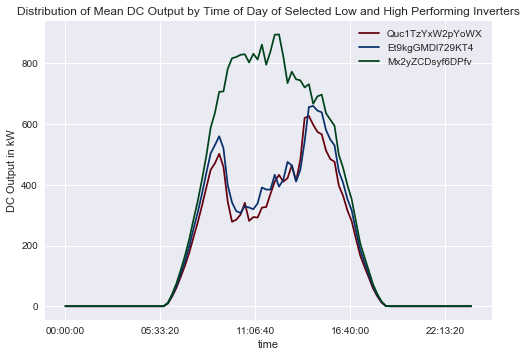

In [142]:
df_plant_1.loc[df_plant_1['Inverter_ID'] == 'Quc1TzYxW2pYoWX',:].groupby('time')['DC_POWER'].agg('mean').plot(legend=True, colormap='Reds_r', label = 'Quc1TzYxW2pYoWX')
df_plant_1.loc[df_plant_1['Inverter_ID'] == 'Et9kgGMDl729KT4',:].groupby('time')['DC_POWER'].agg('mean').plot(legend=True, colormap='Blues_r', label = 'Et9kgGMDl729KT4')
df_plant_1.loc[df_plant_1['Inverter_ID'] == 'Mx2yZCDsyf6DPfv',:].groupby('time')['DC_POWER'].agg('mean').plot(legend=True, colormap='Greens_r', label = 'Mx2yZCDsyf6DPfv')
plt.title('Distribution of Mean DC Output by Time of Day of Selected Low and High Performing Inverters')
plt.ylabel('DC Output in kW')
plt.show()

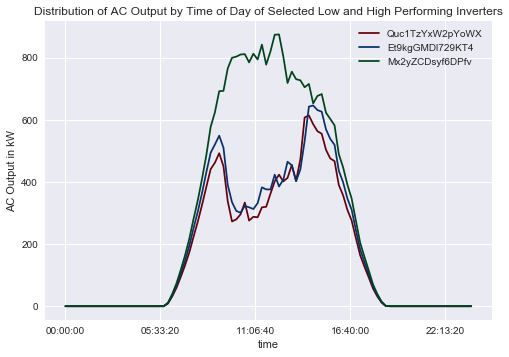

In [141]:
df_plant_1.loc[df_plant_1['Inverter_ID'] == 'Quc1TzYxW2pYoWX',:].groupby('time')['AC_POWER'].agg('mean').plot(legend=True, colormap='Reds_r', label = 'Quc1TzYxW2pYoWX')
df_plant_1.loc[df_plant_1['Inverter_ID'] == 'Et9kgGMDl729KT4',:].groupby('time')['AC_POWER'].agg('mean').plot(legend=True, colormap='Blues_r', label = 'Et9kgGMDl729KT4')
df_plant_1.loc[df_plant_1['Inverter_ID'] == 'Mx2yZCDsyf6DPfv',:].groupby('time')['AC_POWER'].agg('mean').plot(legend=True, colormap='Greens_r', label = 'Mx2yZCDsyf6DPfv')
plt.title('Distribution of AC Output by Time of Day of Selected Low and High Performing Inverters')
plt.ylabel('AC Output in kW')
plt.show()

## Evaluate the efficiency of different inverters
We further investigate on the 2 conversion rates we mentioned above. 
1. Across the entire day the irradiation to DC conversion rate has significant gap between the high performing and low performing inverters. This further indicates that systematic differences persist between panels connected to thees inverters
2. For the DC to AC conversion rate graph, we could observe that the high performing inverter (adLQvlD726eNBSB) has a almost constant DC to AC conversion rate while the low performing ones have depression area during the time where irradiation/outputs is strongest

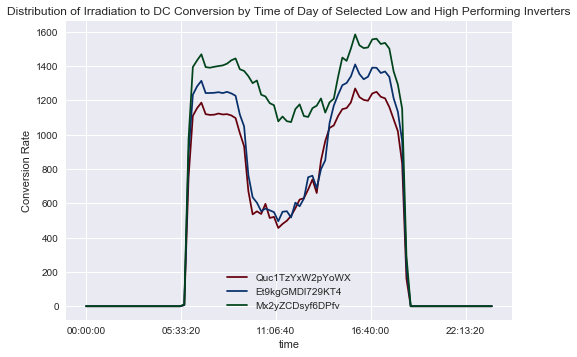

In [140]:
df_plant_1.loc[df_plant_1['Inverter_ID'] == 'Quc1TzYxW2pYoWX',:].groupby('time')['Light_conversion'].agg('mean').plot(legend=True, colormap='Reds_r', label = 'Quc1TzYxW2pYoWX')
df_plant_1.loc[df_plant_1['Inverter_ID'] == 'Et9kgGMDl729KT4',:].groupby('time')['Light_conversion'].agg('mean').plot(legend=True, colormap='Blues_r', label = 'Et9kgGMDl729KT4')
df_plant_1.loc[df_plant_1['Inverter_ID'] == 'Mx2yZCDsyf6DPfv',:].groupby('time')['Light_conversion'].agg('mean').plot(legend=True, colormap='Greens_r', label = 'Mx2yZCDsyf6DPfv')
plt.title('Distribution of Irradiation to DC Conversion by Time of Day of Selected Low and High Performing Inverters')
plt.ylabel('Conversion Rate')
plt.show()

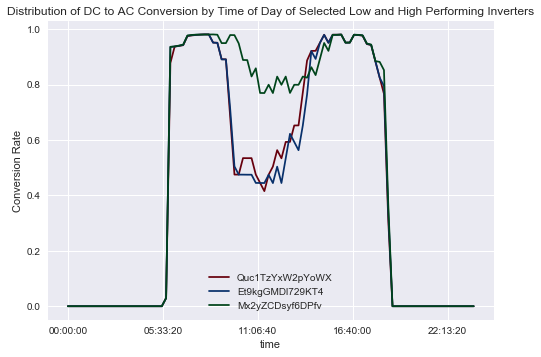

In [139]:
df_plant_1.loc[df_plant_1['Inverter_ID'] == 'Quc1TzYxW2pYoWX',:].groupby('time')['DCAC_conversion'].agg('mean').plot(legend=True, colormap='Reds_r',label = 'Quc1TzYxW2pYoWX')
df_plant_1.loc[df_plant_1['Inverter_ID'] == 'Et9kgGMDl729KT4',:].groupby('time')['DCAC_conversion'].agg('mean').plot(legend=True, colormap='Blues_r', label = 'Et9kgGMDl729KT4')
df_plant_1.loc[df_plant_1['Inverter_ID'] == 'Mx2yZCDsyf6DPfv',:].groupby('time')['DCAC_conversion'].agg('mean').plot(legend=True, colormap='Greens_r', label = 'Mx2yZCDsyf6DPfv')
plt.title('Distribution of DC to AC Conversion by Time of Day of Selected Low and High Performing Inverters')
plt.ylabel('Conversion Rate')
plt.show()

In [ ]:
# df_plant_1.loc[df_plant_1['Inverter_ID'] == 'bvBOhCH3iADSZry',:].groupby('date')['TOTAL_YIELD'].agg('mean').plot(legend=True, colormap='Reds_r', label = 'bvBOhCH3iADSZry')
# df_plant_1.loc[df_plant_1['Inverter_ID'] == '1BY6WEcLGh8j5v7',:].groupby('date')['TOTAL_YIELD'].agg('mean').plot(legend=True, colormap='Blues_r', label = '1BY6WEcLGh8j5v7')
# df_plant_1.loc[df_plant_1['Inverter_ID'] == 'adLQvlD726eNBSB',:].groupby('date')['TOTAL_YIELD'].agg('mean').plot(legend=True, colormap='Greens_r', label = 'adLQvlD726eNBSB')
# plt.title('Total Yield by Dates of Selected Low and High Performing Inverters')
# plt.ylabel('Total Yield')
# plt.show()

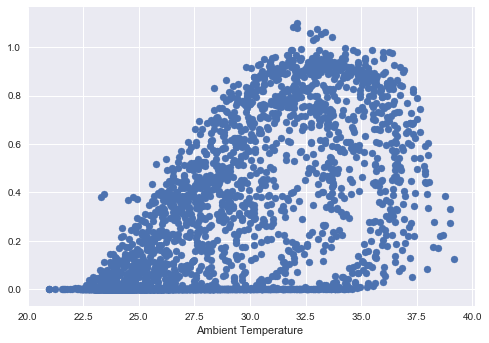

In [30]:
#plt.scatter(df_weather_1.loc[df_weather_1['IRRADIATION']>0.01,'AMBIENT_TEMPERATURE'],df_weather_1.loc[df_weather_1['IRRADIATION']>0.01,'IRRADIATION'])
plt.scatter(df_weather_1['AMBIENT_TEMPERATURE'],df_weather_1['IRRADIATION'])
plt.xlabel('Ambient Temperature ')
plt.show()

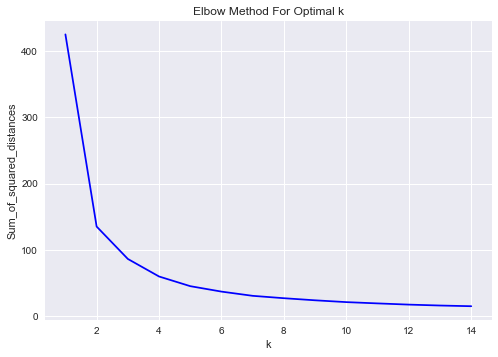

In [54]:
weather_clus = df_weather_1[['AMBIENT_TEMPERATURE','IRRADIATION']]
scaler = MinMaxScaler()
weather_clus_t = scaler.fit_transform(weather_clus)
weather_clus_t = pd.DataFrame({'AMBIENT_TEMPERATURE':weather_clus_t[:, 0], 'IRRADIATION': weather_clus_t[:, 1]})
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(weather_clus_t)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [55]:
km = KMeans(n_clusters=4)
km = km.fit(weather_clus_t)
weather_clus_t['Label'] = km.labels_
weather_clus_t.head()

,AMBIENT_TEMPERATURE,IRRADIATION,Label
0,0.332381,0.000000,1
1,0.325585,0.000000,1
2,0.314688,0.000000,1
3,0.304739,0.000000,1
4,0.309978,0.000000,1
5,0.305405,0.000000,1
6,0.304396,0.000000,1
7,0.300343,0.000000,1
8,0.299330,0.000000,1
9,0.289688,0.000000,1


C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


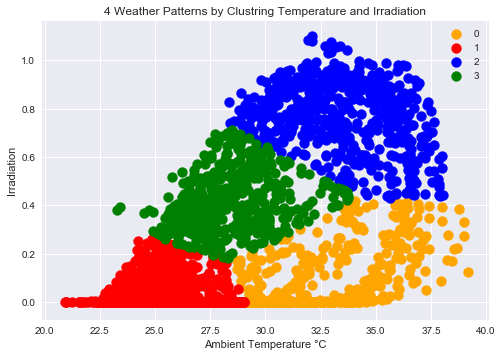

In [56]:
cdict = {0:'orange' ,1: 'red', 2: 'blue', 3: 'green'}
weather_clus['Label'] = weather_clus_t['Label']
#weather_clus = weather_clus.set_index(df_weather_1['DATE_TIME'])
weather_clus['DATE_TIME'] = df_weather_1['DATE_TIME']
group = np.array(weather_clus_t['Label'])
scatter_x = np.array(weather_clus['AMBIENT_TEMPERATURE'])
scatter_y = np.array(weather_clus['IRRADIATION'])
fig, ax = plt.subplots()
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g], label = g, s = 100)
ax.legend()
plt.title('4 Weather Patterns by Clustring Temperature and Irradiation')
plt.xlabel('Ambient Temperature °C')
plt.ylabel('Irradiation')
plt.show()

In [60]:
df_plant_1 = pd.merge(left = df_plant_1, right = weather_clus[['Label','DATE_TIME']], on = 'DATE_TIME')

,DATE_TIME,PLANT_ID,Inverter_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,date,month,hour,time,Light_conversion,DCAC_conversion,Label
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06,27.004764,25.060789,0.0,2020-05-15,5,0,00:00:00,0.0,0.0,1
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09,27.004764,25.060789,0.0,2020-05-15,5,0,00:00:00,0.0,0.0,1
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09,27.004764,25.060789,0.0,2020-05-15,5,0,00:00:00,0.0,0.0,1
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06,27.004764,25.060789,0.0,2020-05-15,5,0,00:00:00,0.0,0.0,1
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07,27.004764,25.060789,0.0,2020-05-15,5,0,00:00:00,0.0,0.0,1
5,2020-05-15 00:00:00,4136001,LYwnQax7tkwH5Cb,0.0,0.0,1872.500000,1.794959e+09,27.004764,25.060789,0.0,2020-05-15,5,0,00:00:00,0.0,0.0,1
6,2020-05-15 00:00:00,4136001,LlT2YUhhzqhg5Sw,0.0,0.0,1094.357143,2.825928e+08,27.004764,25.060789,0.0,2020-05-15,5,0,00:00:00,0.0,0.0,1
7,2020-05-15 00:00:00,4136001,Mx2yZCDsyf6DPfv,0.0,0.0,5692.200000,2.453646e+06,27.004764,25.060789,0.0,2020-05-15,5,0,00:00:00,0.0,0.0,1
8,2020-05-15 00:00:00,4136001,NgDl19wMapZy17u,0.0,0.0,1866.200000,1.115126e+08,27.004764,25.060789,0.0,2020-05-15,5,0,00:00:00,0.0,0.0,1
9,2020-05-15 00:00:00,4136001,PeE6FRyGXUgsRhN,0.0,0.0,651.200000,1.348351e+09,27.004764,25.060789,0.0,2020-05-15,5,0,00:00:00,0.0,0.0,1


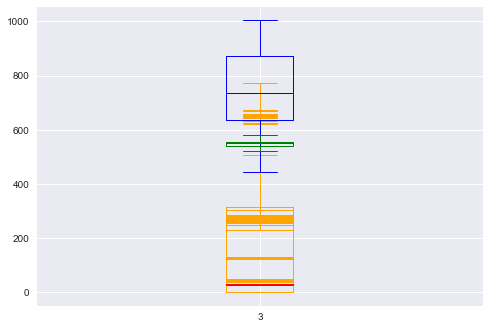

In [84]:
df_plant_1.loc[df_plant_1['Label'] == 0,:].groupby('Inverter_ID')['DC_POWER'].gg('mean')(legend=True, color='Orange',label = 0, kind = 'box')
df_plant_1.loc[df_plant_1['Label'] == 1,:].groupby('Inverter_ID')['DC_POWER'].agg('mean').plot(legend=True, color='Red',label = 1, kind = 'box')
df_plant_1.loc[df_plant_1['Label'] == 2,:].groupby('Inverter_ID')['DC_POWER'].agg('mean').plot(legend=True, color='Blue',label = 2, kind = 'box')
df_plant_1.loc[df_plant_1['Label'] == 3,:].groupby('Inverter_ID')['DC_POWER'].agg('mean').plot(legend=True, color='Green',label = 3, kind = 'box')
plt.show()

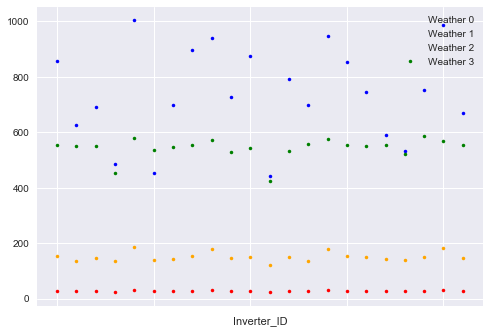

In [90]:
df_plant_1.loc[df_plant_1['Label'] == 0,:].groupby('Inverter_ID')['DC_POWER'].agg('mean').plot(legend=True, color='Orange',label = 'Weather 0', style = '.')
df_plant_1.loc[df_plant_1['Label'] == 1,:].groupby('Inverter_ID')['DC_POWER'].agg('mean').plot(legend=True, color='Red',label = 'Weather 1', style = '.')
df_plant_1.loc[df_plant_1['Label'] == 2,:].groupby('Inverter_ID')['DC_POWER'].agg('mean').plot(legend=True, color='Blue',label = 'Weather 2', style = '.')
df_plant_1.loc[df_plant_1['Label'] == 3,:].groupby('Inverter_ID')['DC_POWER'].agg('mean').plot(legend=True, color='Green',label = 'Weather 3', style = '.')
plt.show()

In [ ]:
df_plant_1.loc[df_plant_1['Inverter_ID'] == 'Quc1TzYxW2pYoWX',:].groupby('time')['DCAC_conversion'].agg('mean').plot(legend=True, colormap='Reds_r',label = 'Quc1TzYxW2pYoWX')
df_plant_1.loc[df_plant_1['Inverter_ID'] == 'Et9kgGMDl729KT4',:].groupby('time')['DCAC_conversion'].agg('mean').plot(legend=True, colormap='Blues_r', label = 'Et9kgGMDl729KT4')
df_plant_1.loc[df_plant_1['Inverter_ID'] == 'Mx2yZCDsyf6DPfv',:]

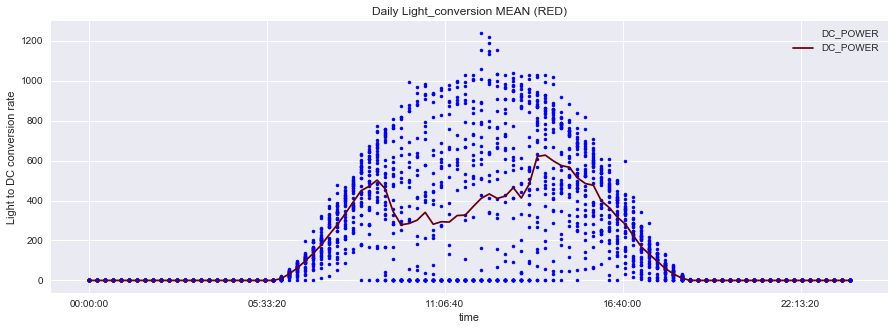

In [99]:
df_plant_1.loc[df_plant_1['Inverter_ID'] == 'Quc1TzYxW2pYoWX',:].plot(x='time', y = 'DC_POWER' , style='b.', figsize=(15,5))
df_plant_1.loc[df_plant_1['Inverter_ID'] == 'Quc1TzYxW2pYoWX',:].groupby('time')['DC_POWER' ].agg('mean').plot(legend=True, colormap='Reds_r')
plt.title('Daily Light_conversion MEAN (RED)')
plt.ylabel('Light to DC conversion rate')
plt.show()

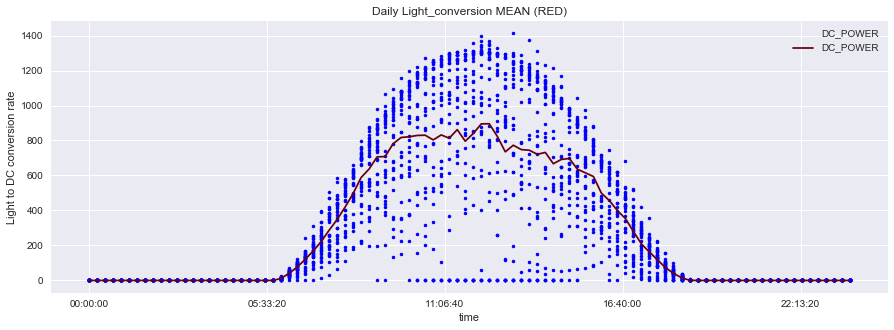

In [101]:
df_plant_1.loc[df_plant_1['Inverter_ID'] == 'Mx2yZCDsyf6DPfv',:].plot(x='time', y = 'DC_POWER' , style='b.', figsize=(15,5))
df_plant_1.loc[df_plant_1['Inverter_ID'] == 'Mx2yZCDsyf6DPfv',:].groupby('time')['DC_POWER' ].agg('mean').plot(legend=True, colormap='Reds_r')
plt.title('Daily Light_conversion MEAN (RED)')
plt.ylabel('Light to DC conversion rate')
plt.show()

In [111]:
calendar_dc_bad = df_plant_1.loc[df_plant_1['Inverter_ID'] == 'Quc1TzYxW2pYoWX',:].pivot_table(values='DC_POWER', index='time', columns='date')
calendar_dc_good = df_plant_1.loc[df_plant_1['Inverter_ID'] == 'Mx2yZCDsyf6DPfv',:].pivot_table(values='DC_POWER', index='time', columns='date')
calendar_dc_weather = df_plant_1.pivot_table(values='IRRADIATION', index='time', columns='date')

In [120]:
#define function to multi plot

def multi_plot(data= None, row = None, col = None, title = None):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,20)) 
    
    gp.subplots_adjust(wspace=0.2, hspace=0.8)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, style = 'k.')
        ax.set_title('{} {}'.format(title, cols[i-1]))

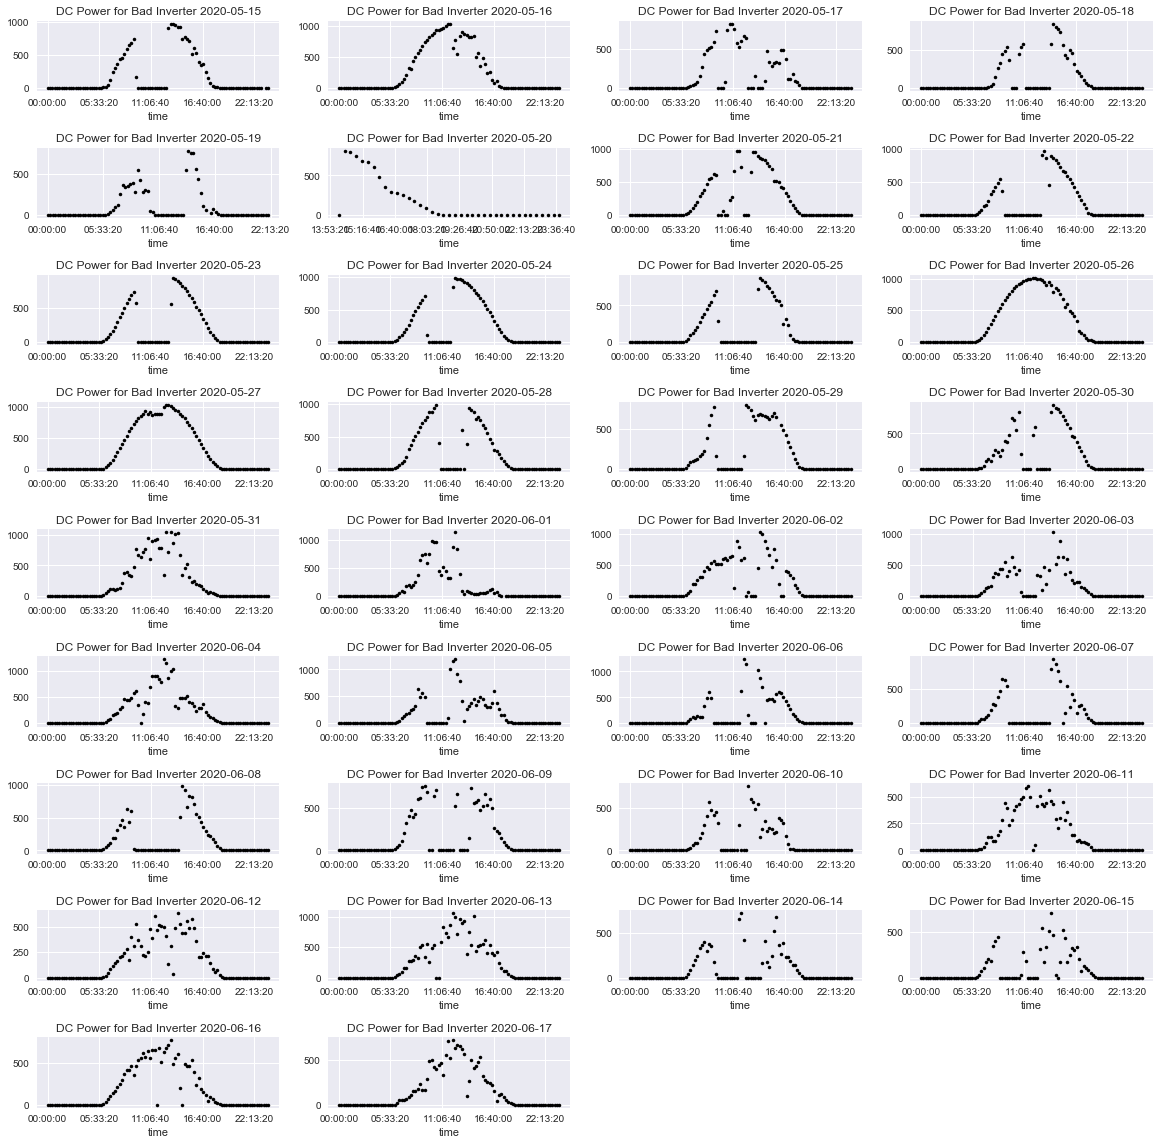

In [143]:
multi_plot(data=calendar_dc_bad, row=9, col=4, title = 'DC Power for Bad Inverter')
plt.show()

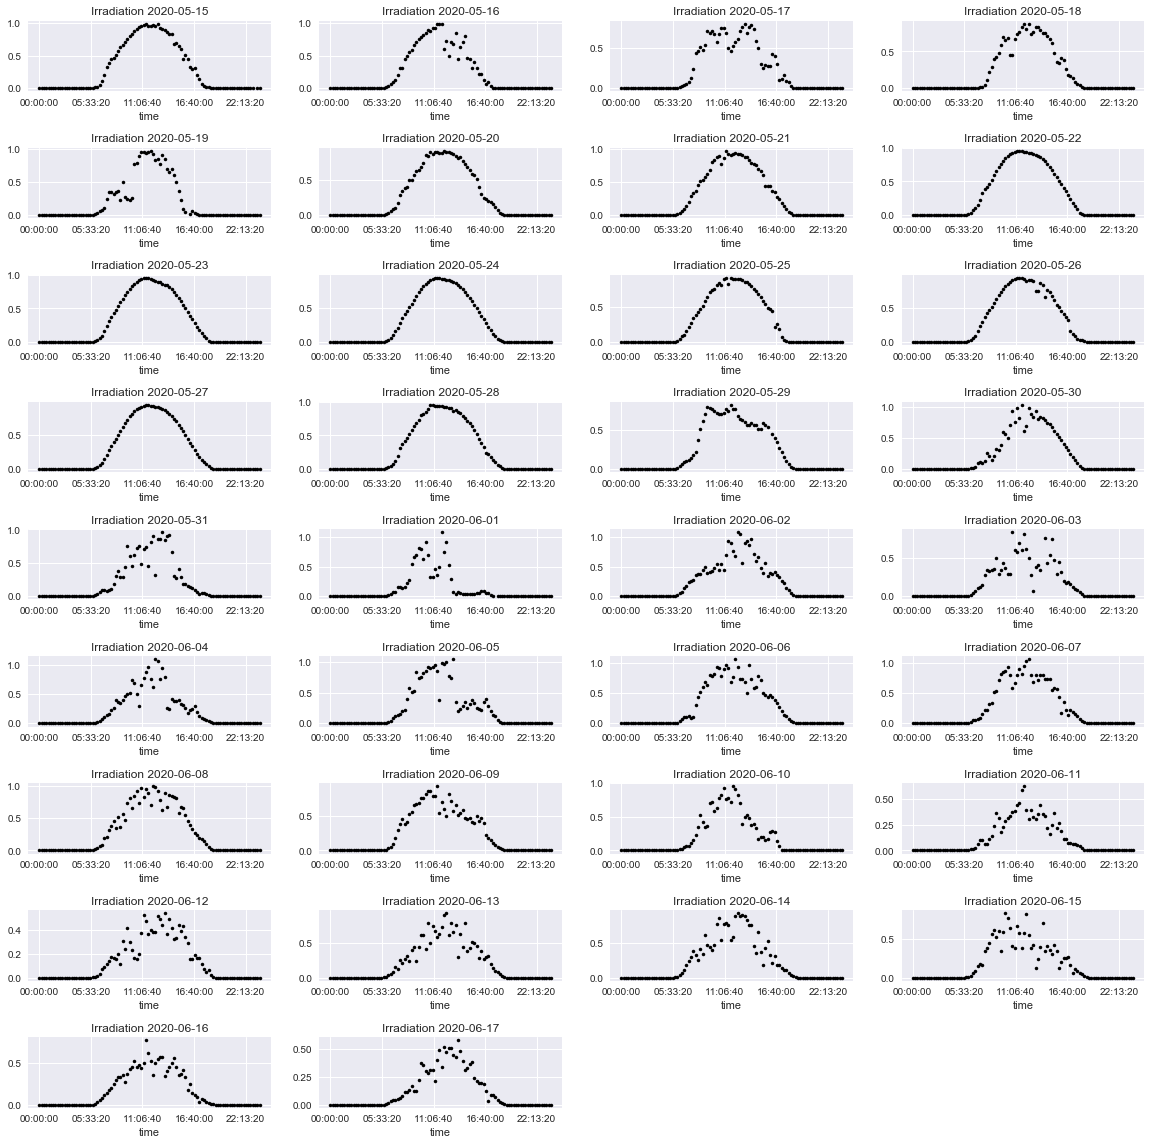

In [123]:
multi_plot(data=calendar_dc_weather, row=9, col=4, title = 'Irradiation')
plt.show()

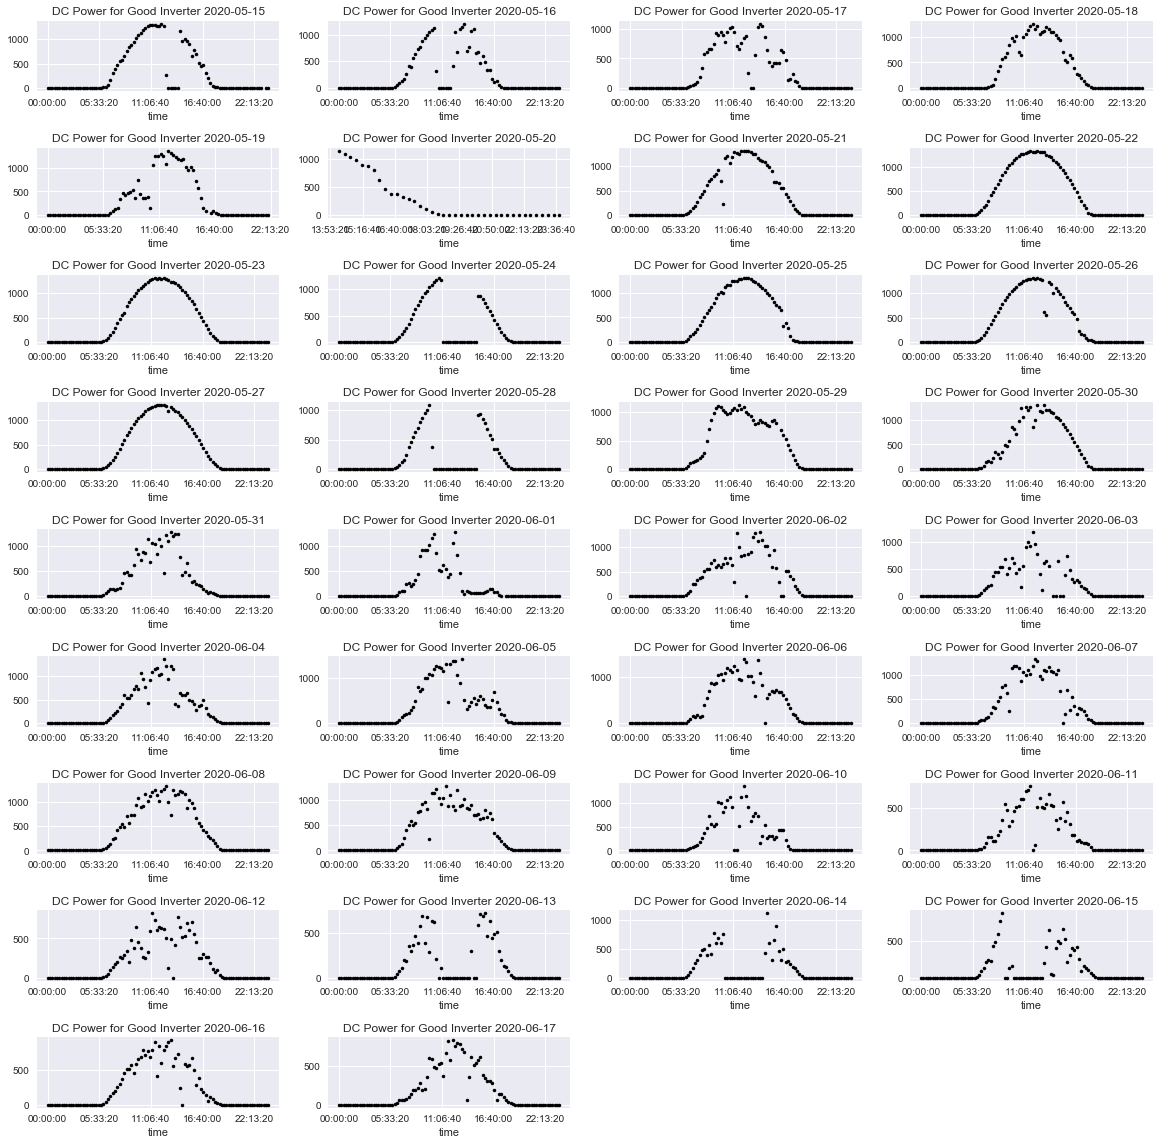

In [144]:
multi_plot(data=calendar_dc_good, row=9, col=4, title = 'DC Power for Good Inverter')
plt.show()